# Statistical modeling 

## 1. Logistic regression

### Importing packages

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

In [8]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
import sys
import warnings
warnings.filterwarnings("ignore")

## ----- Example code 1 -----

In [11]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [12]:
# locate missing value
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
data["age"].value_counts(dropna =False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: age, Length: 89, dtype: int64

In [14]:
# fill missing data
data['age'].fillna(data['age'].mean(), inplace = True)

In [15]:
# drop na values
data['age'].dropna(inplace = True)

In [16]:
tmp_d = data[['age', 'sex', 'class', 'fare', 'survived']]

In [17]:
# encode categorical features
tmp_X = pd.concat([tmp_d[[x for x in tmp_d.columns if x not in ['sex', 'class', 'survived']]], #.astype('unit8'),
                   pd.get_dummies(tmp_d['sex'], drop_first = True, prefix = 'sex'),
                   pd.get_dummies(tmp_d['class'], drop_first = True, prefix = 'class')
                  ], axis = 1)
tmp_X

,age,fare,sex_male,class_Second,class_Third
0,22.000000,7.2500,1,0,1
1,38.000000,71.2833,0,0,0
2,26.000000,7.9250,0,0,1
3,35.000000,53.1000,0,0,0
4,35.000000,8.0500,1,0,1
...,...,...,...,...,...
886,27.000000,13.0000,1,1,0
887,19.000000,30.0000,0,0,0
888,29.699118,23.4500,0,0,1
889,26.000000,30.0000,1,0,0


In [18]:
# add constant
tmp_X = sm.add_constant(tmp_X)
tmp_X.head()

,const,age,fare,sex_male,class_Second,class_Third
0,1.0,22.0,7.2500,1,0,1
1,1.0,38.0,71.2833,0,0,0
2,1.0,26.0,7.9250,0,0,1
3,1.0,35.0,53.1000,0,0,0
4,1.0,35.0,8.0500,1,0,1


In [19]:
# check for multicollinearity
vif = pd.DataFrame()
vif['Variable'] = tmp_X.columns
vif['VIF'] = [VIF(tmp_X.values, i) for i in range(tmp_X.shape[1])]
vif

,Variable,VIF
0,const,21.066028
1,age,1.164642
2,fare,1.603741
3,sex_male,1.057071
4,class_Second,1.992852
5,class_Third,2.557472


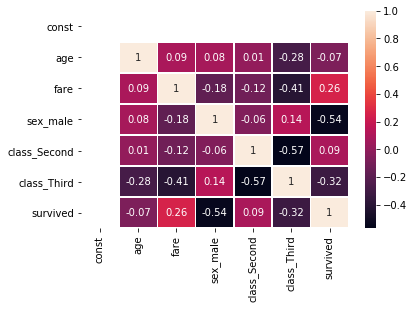

In [20]:
# check for correlation among variables
sns.heatmap(pd.concat([tmp_X, tmp_d['survived']], axis = 1).corr().round(2), annot=True, linewidths = 0.5)

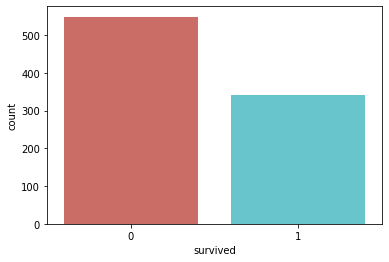

In [21]:
# imbalanced dataset
sns.countplot(x = 'survived', data = tmp_d, palette = 'hls')

In [22]:
# splitting the data into training and testing sets
tmp_y = tmp_d['survived']
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y, test_size = 0.2, random_state = 0)

In [23]:
# # Scale the data; normalize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [24]:
# fitting the model
model = sm.Logit(y_train, X_train, random_state = 0)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.458795
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                  0.3108
Time:                        18:47:31   Log-Likelihood:                -326.66
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 1.410e-61
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.5022      0.463      7.569      0.000       2.595       4.409
age             -0.0361

In [25]:
# fitting the model
from sklearn.linear_model import LogisticRegression
# Initialize the model
model = LogisticRegression()
# Train the model
result = model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [26]:
coefficients = model.coef_
for i, feature in enumerate(tmp_X.columns):
    print(f"Feature: {feature}, Coefficient: {coefficients[0][i]}")

Feature: const, Coefficient: -0.00034025978446984426
Feature: age, Coefficient: -0.03321682245502293
Feature: fare, Coefficient: 0.001412938494645329
Feature: sex_male, Coefficient: -2.4301860296510767
Feature: class_Second, Coefficient: -0.7895493403249177
Feature: class_Third, Coefficient: -1.9004826208821028


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7932960893854749
Precision: 0.7424242424242424
Recall: 0.7101449275362319
Confusion Matrix:
[[93 17]
 [20 49]]


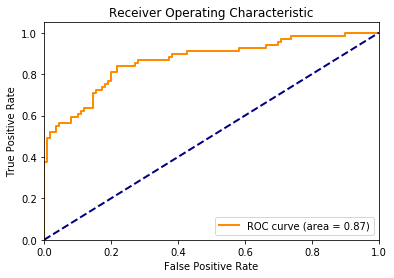

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## ----- Example code 2-----

### Pre-defined functions

In [30]:
def fetch_stat(res, x):
    # Fetching the statistics
    stat_df = pd.DataFrame({'coefficients': res.params, 'p-value': res.pvalues, 'odds_ratio': np.exp(res.params)})
    # condition for significant parameters
    significant_params = stat_df[stat_df['p-value']<=0.05].index
    significant_params = significant_params.drop('const')
    
    print('Total number of parameters: %s '%len(X.keys()))
    print('Number of significant parameters: %s '%(len(significant_params)))
    
    return significant_params, stat_df

In [31]:
def res_pred(tmp_X_test, tmp_y_test, tmp_res):
    y_pred = tmp_res.predict(tmp_X_test)
    fpr, tpr, thresholds = roc_curve(tmp_y_test, y_pred)

    # to get roc stats in df
    roc_df = pd.DataFramme({'thresholds': thresholds, 'tpr': tpr, 'fpr': fpr})
    # calculate AUC
    auc = roc_auc_score(tmp_y_test, y_pred)
    print('AUC: %.3f' % auc)
    
    # plotting the ROC curve
    plt.figure(figsize=(12,8))
    plt.plot(fpr, tpr, label = 'Logistic Regression (AUC = %0.3f)'%auc, marker = 'o')
    plt.plot([0,1], [0,1], '-')
    plt.xlim(0,1)
    plt.ylim(0,1.05)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics')
    plt.legend(loc = 'lower right')
    plt.show()
    
    # converting y into binary. here 0.5 is the threshold
    opt_thr = 0.5
    y_pred = tmp_res.predict(tmp_X_test)
    y_pred = np.where(y_pred > opt_thr, 1, 0)
    
    # Getting confusion matrix
    cm = confusion_matrix(tmp_y_test, y_pred)
    ax = sns.heatmmap(cm, annot = True, fmt = "0", annot_kws = {"size": 20})
    plt.xlabel('Predicted output', fontsize = 20)
    plt.ylabel('Actual output', fontsize = 20)
    
    # Classification report
    print(classification_report(tmp_y_test, y_pred))

### Loading datasets

### ...

### Data preprocessing

In [ ]:
# checking duplicated users
df['user_id'].duplicated().sum()

In [ ]:
# checking missing values: remove missing data values, input missing data based on other values
df.isnull().sum()

In [ ]:
# encode categorical features
tmp_d = df.copy()
tmp_d['signup_platform'] = tmp_d['signup_platform'].map(lambda x:x if x == 'web' else 'non_web') # change x value to web if web, otherwise change to non_web
tmp_d['signup_method'] = tmp_d['signup_method'].map(lambda x:'Email' if x == 'Email Signup' else 'non_Email') # change x value to email if email signup, otherwise change to non_email

In [ ]:
tmp_X = pd.concat([tmp_d[[x for x in tmp_d.columns if x not in ['signup_platform', 'signup_method', 'signup_source', 'day']]].astype('unit8'),
                   pd.get_dummies(tmp_d['signup_platform'], drop_first=True, prefix = 'platform'),
                   pd.get_dummies(tmp_d['signup_method'], drop_first=True, prefix = 'method'),
                   pd.get_dummies(tmp_d['signup_source'], drop_first=True, prefix = 'source')
                  ], axis = 1)

In [ ]:
# add constant
tmp_X = sm.add_constant(tmp_x)
tmp_X.head()

### Check correlation

In [ ]:
## check for multicollinearity
vif = pd.DataFrame()
vif['Variable'] = tmp_X.columns
vif['VIF'] = [VIF(tmp_X.values, i) for i in range(tmp_X.shape[1])]
# VIF = 1.5 is conservative threshold. > 10 big issue with model; VIF not higer than 2 or 3

In [ ]:
## check for correlation among variables. features with > 0.8 correlation are suspicious
sns.heatmmap(pd.concat([tmp_X, tmp_d['is_m1_wau']], axis = 1).corr().round(2), annot=True, linewidths = 0.5)
tmp_X.drop({view_content_3d}, axis = 1, inplace = True)

### Check data size

In [ ]:
# Check whether dataset size is sufficient: rule of thumb is 50 records per feature
tmp_X.info()

### Imbalanced dataset

In [ ]:
# check how many are retained
tmp_d['is_m1_wau'].value_counts()

In [ ]:
sns.countplot(x = 'is_m1_wau', data = tmp_d, palette = 'hls')
# if imbalanced dataset, can do weighted logistic regression or oversampling

### Fitting the modal

In [ ]:
tmp_y = tmp_d['is_m1_wau']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y, test_size = 0.2, random_state = 0)
model = sm.Logit(y_train, X_train, random_state = 0)
result = model.fit()
print(result.summary())

### Feature importance

In [ ]:
d_significant_params, d_stat_df = fetch_stat(result, tmp_X)
d_stat_df.loc[d_significant_params].sort_values('odds_ratio', ascending = False)['odds_ratio'].reset_index()

In [ ]:
# interpretation: edit_content_3d: the odd for retaining at end of M1 are 163% higher for the users who did Edit action during first 3 days after signing up

### Prediction, testing and accuracy

In [ ]:
res_pred(X_test, y_test, result)

# Appendix

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://configr.medium.com/data-modeling-using-python-8dcd47f01b78